# Araba Fiyat Tahmini (Car Price Prediction)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#ROOT_DIR = "/content/drive/MyDrive/CASGEM-Egitim/Egitim-Part1/Day1-Intro/notebooks"
#DATASET_PATH = ROOT_DIR + "/datasets/"

ROOT_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining-2nd/main/PART1/Day1-Intro/notebooks"
DATASET_PATH = ROOT_DIR + "/datasets/"

In [ ]:
data = pd.read_csv(DATASET_PATH + "car_data.csv")
data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0



* Car_Name (Araba Adı)
* Year (Yıl)
* Selling_Price (Satış Fiyatı)
* Present_Price (Mevcut Fiyat)
* Kms_Driven (Kullanılan KM)
* Fuel_Type (Yakıt Tipi)
* Seller_Type (Satıcı Türü)
* Transmission (Vites)
* Owner (Mal Sahibi)


Kolonlardaki **NaN** (boş değer) olup olmadığını kontrol ediniz.

In [ ]:
# tüm kolonlar için boş değer kontrolü
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [ ]:
pd.isnull(data).values.sum()

0

**"Fuel_Type"** kolonunda farklı kategorilerde kaç adet örnek olduğunu pandas dataframe'in `value_counts()` property'sinden yararlanarak görüntüleyiniz.

In [ ]:
# Fuel_Type kategorilerine göre toplam değer kontrolü
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

**"Seller_Type"** kolonunda farklı kategorilerde kaç adet örnek olduğunu pandas dataframe'in `value_counts()` property'sinden yararlanarak görüntüleyiniz

In [ ]:
data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

**"Transmission"** kolonunda farklı kategorilerde kaç adet örnek olduğunu pandas dataframe'in `value_counts()` property'sinden yararlanarak görüntüleyiniz

In [ ]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


1. **"Fuel_Type"** değerlerinden Petrol olan değerleri 0 ile, Diesel olan değerleri 1 ile ve CNG olan değerleri 2 ile değiştiriniz.

2. **"Seller_Type"** değerlerinden Dealer olan değerleri 0 ile, Individual olan değerleri 1 ile değiştiriniz.

3. **"Transmission"** değerlerinden Manuel olan değerleri 0 ile, Automatic olan değerleri 1 ile değiştiriniz.

In [ ]:
data['Fuel_Type'].replace({'Petrol' : 0, 'Diesel' : 1, 'CNG': 2}, inplace=True)
data['Seller_Type'].replace({'Dealer' : 0, 'Individual' : 1}, inplace=True)
data['Transmission'].replace({'Manual' : 0, 'Automatic' : 1}, inplace=True)

In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [ ]:
data['Fuel_Type'].value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [ ]:
data["Selling_Price"]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

"Selling_Price" kolonu hedef (sınıf) değişkenimizdir.

"Selling_Price" ve "Car_Name" kolonları haricindeki tüm kolonlar özniteliklerimizdir (feature).

Buna göre modele giriş olarak vermek üzere X (features) ve y (label) değişkenlerini tanımlayınız.

In [ ]:
y = data["Selling_Price"]

X = data.drop(["Selling_Price","Car_Name"], axis=1)

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Eğitim ve test kümelerini %80-%20 olacak şekilde ayırınız ve eğitim ve test kümelerinin boyutlarını yazdırınız.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


Varsayılan (default) hiperparametreler ile LinearRegression modelini tanımlayınız ve eğitiniz.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

Test veri kümesi ile tahmin sonuçlarını elde ediniz.

In [ ]:
x_test.iloc[0]

Year              2016.0
Present_Price        8.5
Kms_Driven       15059.0
Fuel_Type            0.0
Seller_Type          0.0
Transmission         1.0
Owner                0.0
Name: 285, dtype: float64

In [ ]:
predicts=lr.predict(x_test)
predicts

array([ 7.90306657e+00,  2.97119489e+00, -6.31461399e-01,  4.23870324e+00,
        4.69796947e-01,  5.86764870e+00,  1.97585780e+00,  2.55221846e+00,
        7.77658278e+00,  9.86272345e-01,  7.96230436e+00,  3.52999475e+00,
        4.93446801e+00,  4.70835569e+00, -2.17912124e+00,  3.15127350e+00,
        7.81963334e+00,  6.56864177e+00,  6.92856783e+00,  7.84860346e+00,
        4.36314838e+00,  4.00488080e+00,  1.13827473e+01,  8.11640644e+00,
        9.74542306e+00,  7.10469127e+00,  3.82656109e+00,  1.06579242e+00,
       -6.08453503e-01, -6.48336664e-01, -9.25682498e-03, -1.32490194e+00,
        4.31288611e+00,  2.06163088e+01,  1.86799111e+01,  4.30101131e+00,
        3.49159874e+00,  1.67884456e+00, -2.57636348e-02,  5.79524992e+00,
        8.12485094e+00,  9.73898397e+00,  4.37830695e-01,  5.88613271e+00,
        5.69966462e+00,  4.35239754e+00,  7.19855743e+00,  5.91057865e+00,
        8.04585811e+00,  1.66879005e+00,  3.84665454e+00,  1.77001833e+00,
        2.50302521e+00,  

Orjinal ve prediction (tahmin) sonuçlarını aynı grafik üzerinde karşılaştırabilcek şekilde çizdiriniz.

In [ ]:
y_test

285     7.40
248     4.00
150     0.50
217     3.15
107     1.25
       ...  
62     18.75
154     0.50
218     6.45
286     5.65
186     0.25
Name: Selling_Price, Length: 61, dtype: float64

In [ ]:
test_index=y_test.reset_index()["Selling_Price"]
test_index

0      7.40
1      4.00
2      0.50
3      3.15
4      1.25
      ...  
56    18.75
57     0.50
58     6.45
59     5.65
60     0.25
Name: Selling_Price, Length: 61, dtype: float64

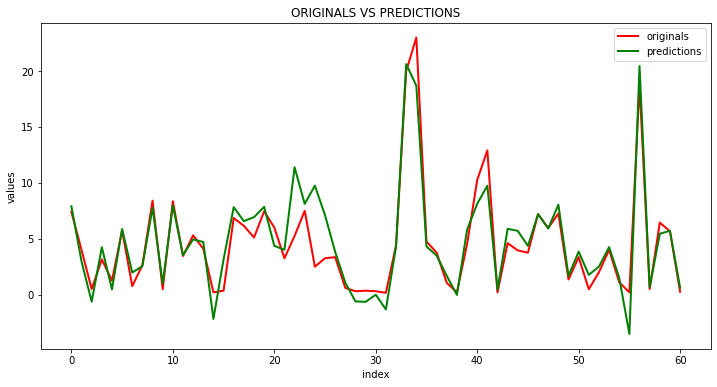

In [ ]:
# Plot for prediction vs originals
test_index=y_test.reset_index()["Selling_Price"]

ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")

prediction=pd.DataFrame(predicts)
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")

plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

plt.show()